# GRIP : The Spark Foundation
## Data Science & Business Analytics Internship
``` Author: Gujjala Sai Eswar ```
> Task-6: Prediction using Decision Tree Algorithm
>> Our Task is to create the Decision Tree Classifier and Visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

``` Dataset: https://bit.ly/3kXTdox ```

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
data = pd.read_csv('Dataset/Iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

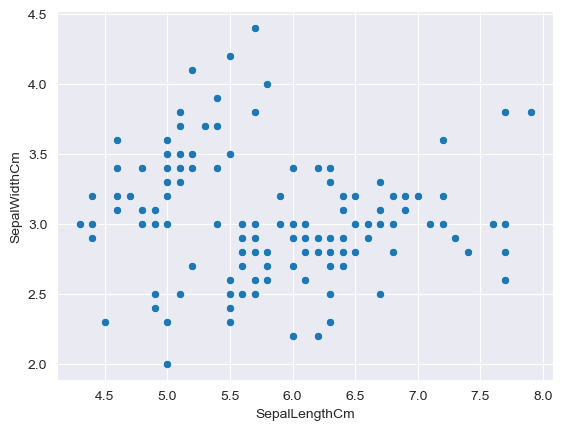

In [12]:
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

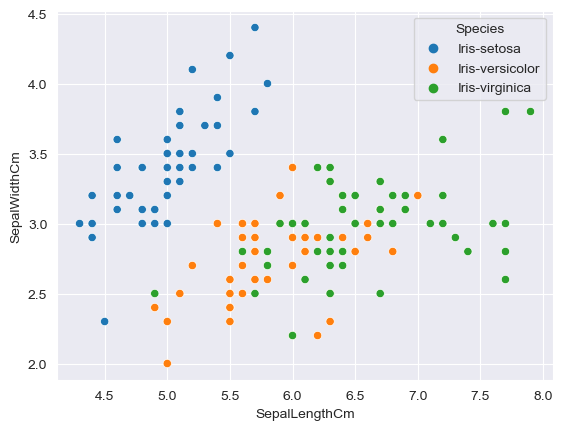

In [13]:
sns.scatterplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

In [14]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

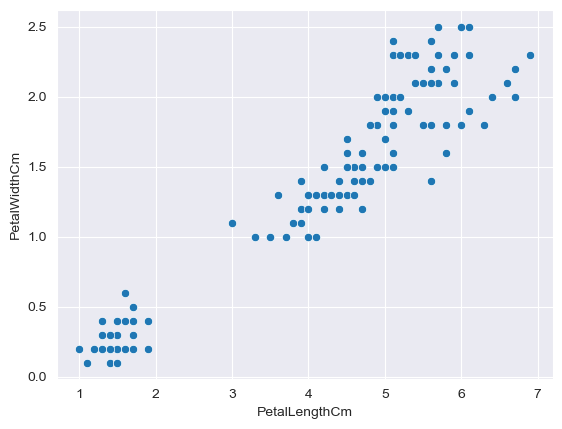

In [15]:
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

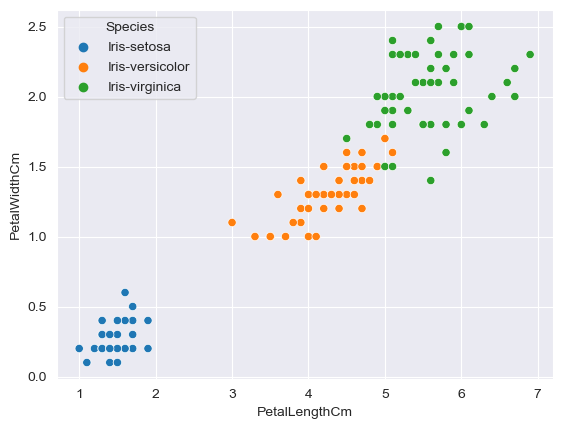

In [16]:
sns.scatterplot(data=data, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

In [17]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


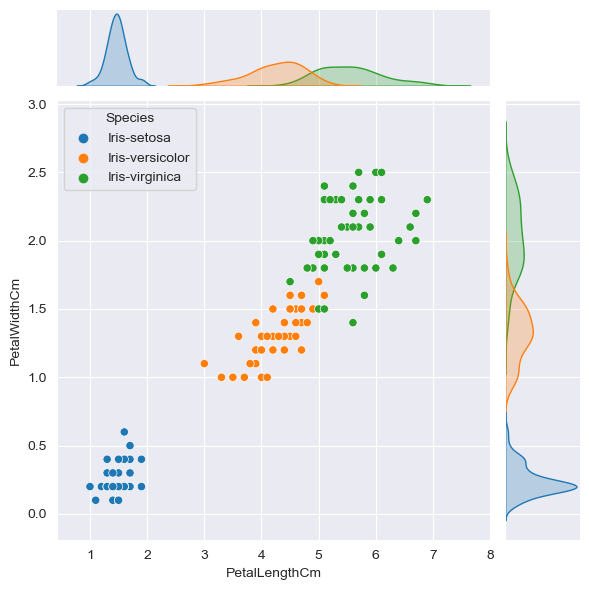

In [18]:
sns.jointplot(data=data, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

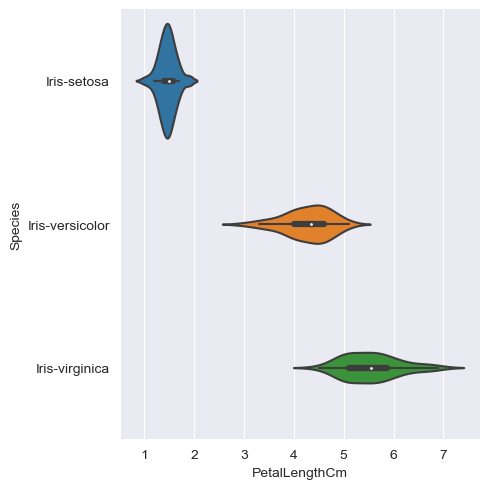

In [19]:
sns.catplot(data=data, y="Species", x="PetalLengthCm", kind="violin")

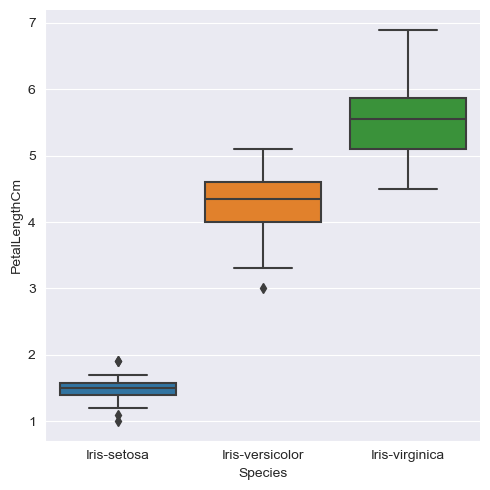

In [20]:
sns.catplot(x='Species',y='PetalLengthCm',data=data,kind='box')

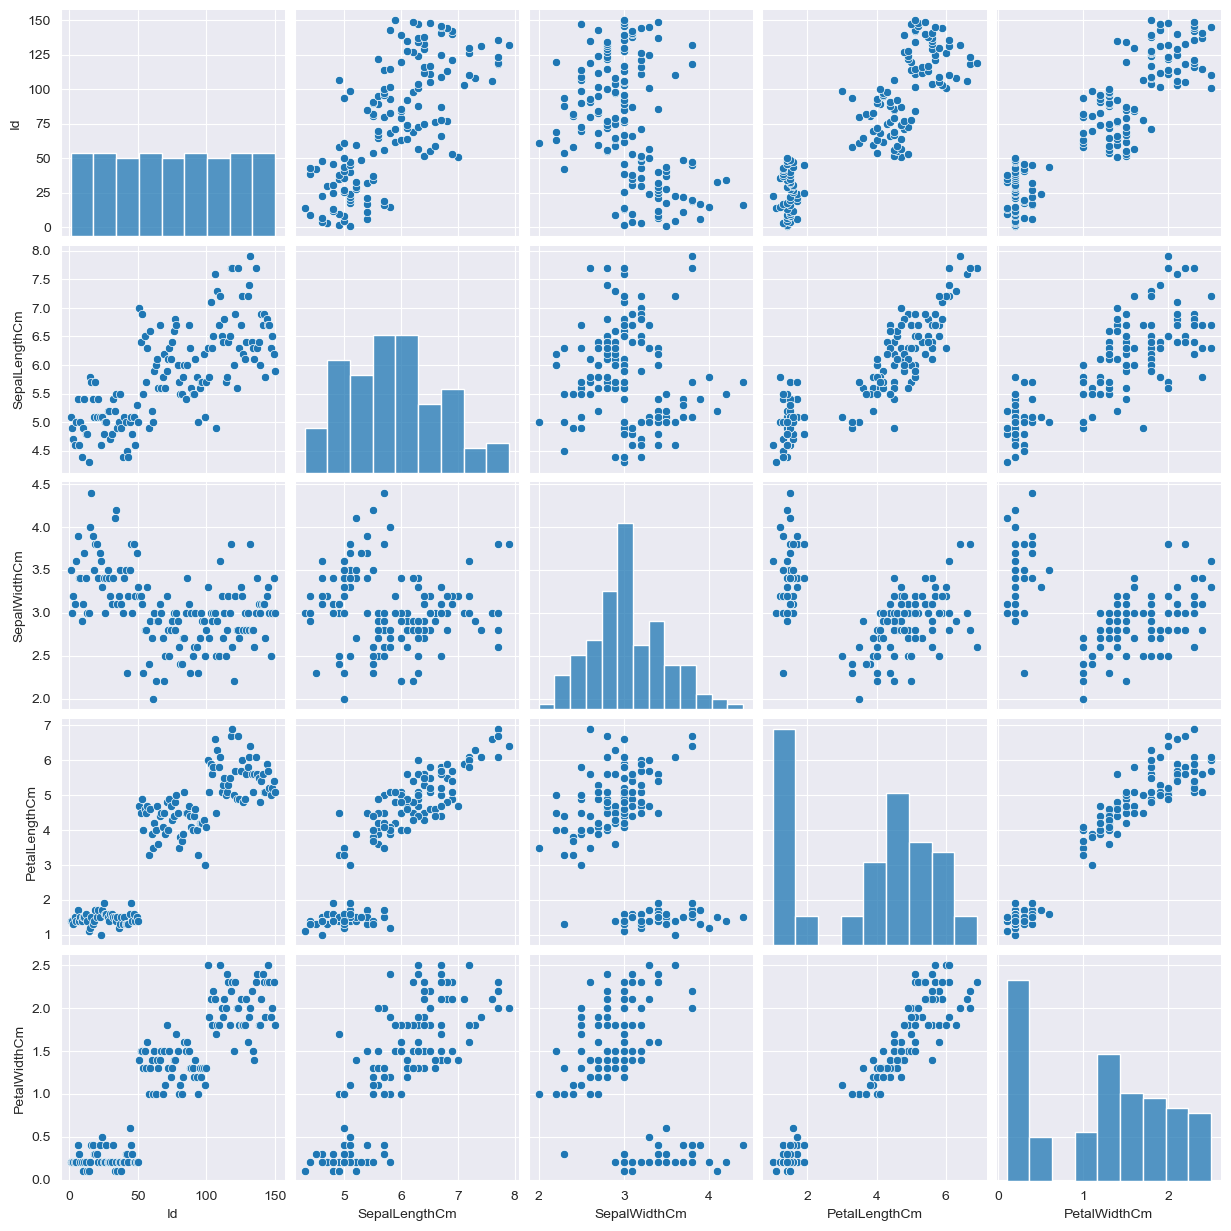

In [21]:
sns.pairplot(data)

In [22]:
data = data.drop("Id", axis=1)

In [23]:
X = data.drop("Species", axis=1)
y = data.Species

In [24]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc_model = DecisionTreeClassifier()

In [30]:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
prediction = dtc_model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

### Confusion Matrix

In [33]:
confusion_matrix(y_test, prediction)

array([[13,  0,  0],
       [ 0, 10,  0],
       [ 0,  3, 12]], dtype=int64)

C:\Users\gujja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


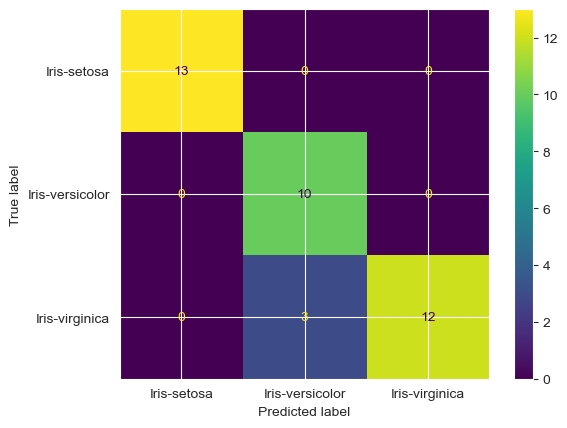

In [34]:
plot_confusion_matrix(dtc_model, X_test, y_test)

### Classification Report

In [35]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.92        38
      macro avg       0.92      0.93      0.92        38
   weighted avg       0.94      0.92      0.92        38



### Visualize Decision Tree

In [36]:
from sklearn import tree
from sklearn.tree import plot_tree

In [37]:
classifier_tree = tree.DecisionTreeClassifier()
classifier_tree = classifier_tree.fit(X_train, y_train)

In [38]:
text_representation = tree.export_text(classifier_tree)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: Iris-virginica



[Text(0.4, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [37, 40, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.498\nsamples = 75\nvalue = [0, 40, 35]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.4166666666666667, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 5.05\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.7, 0.4166666666666667, 'X[0] <= 6.5\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(0.6, 0.25, 'X[1] <= 3.1\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.7,

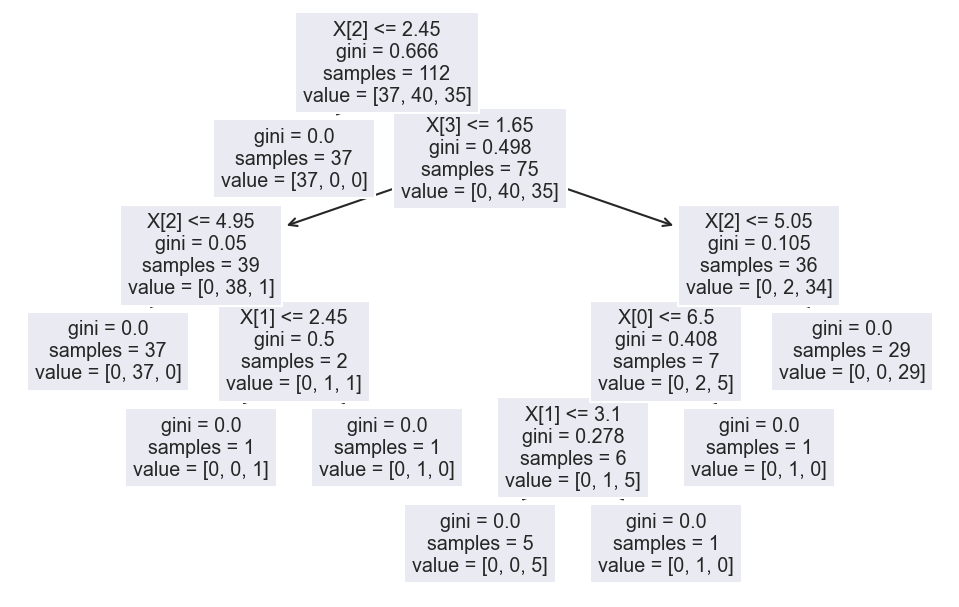

In [48]:
plt.figure(figsize=(8, 5), dpi = 150)
plot_tree(dtc_model)

[Text(0.4, 0.9166666666666666, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [37, 40, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.75, 'PetalWidthCm <= 1.65\ngini = 0.498\nsamples = 75\nvalue = [0, 40, 35]'),
 Text(0.2, 0.5833333333333334, 'PetalLengthCm <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.4166666666666667, 'SepalWidthCm <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'PetalLengthCm <= 5.05\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.7, 0.4166666666666667, 'SepalLengthCm <= 6.5\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(0.6, 0.25, 'SepalWidthCm <= 3.1\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.5, 0.0833333333333333

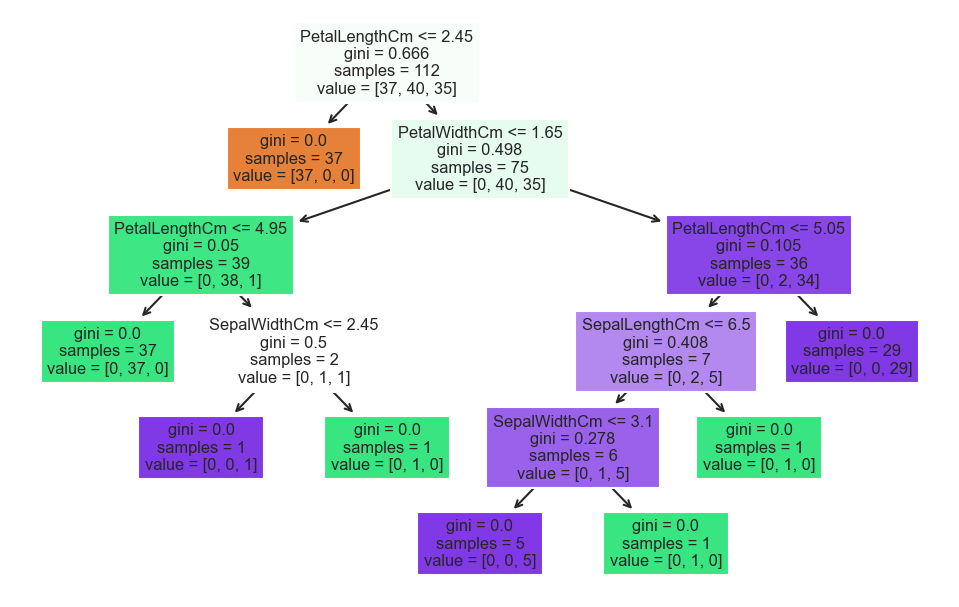

In [49]:
plt.figure(figsize=(8, 5), dpi=150)
plot_tree(dtc_model, filled=True, feature_names=X.columns)

In [41]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Prediction on existing data

In [42]:
old_data = data.iloc[5]

In [43]:
old_data.drop("Species", inplace=True)

C:\Users\gujja\AppData\Local\Temp\ipykernel_11612\219401352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_data.drop("Species", inplace=True)


In [44]:
dtc_model.predict([old_data])

C:\Users\gujja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [45]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Predicting new data

In [46]:
dtc_model.predict([[5.6, 3.1, 4.3, 2.1]])

C:\Users\gujja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)